In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import (BaggingClassifier, StackingClassifier, RandomForestClassifier, 
                            GradientBoostingClassifier, VotingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import sklearn.datasets as datasets
from sklearn.metrics import accuracy_score

# Dataset

In [5]:
df = pd.read_csv(r'data\ensemble.csv', header=None, names='x y label'.split())

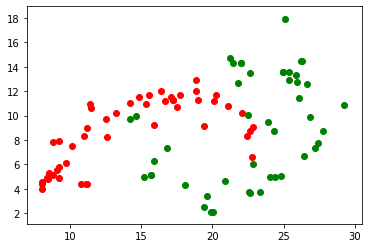

In [6]:
colors = 'r g'.split()
for idx, row in df.iterrows():
    plt.scatter(x=row.x, y=row.y, c=colors[int(row.label)])

In [7]:
X = df[['x', 'y']].to_numpy()
y = df[['label']].to_numpy().ravel()

# Bagging

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)

In [6]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

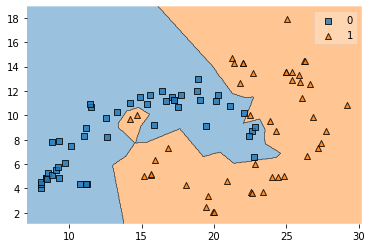

In [7]:
plot_decision_regions(X=X, y=y, clf=knn)

In [8]:
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=1), n_estimators=100, max_samples=0.3)

In [9]:
bagging.fit(X, y)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1),
                  max_samples=0.3, n_estimators=100)

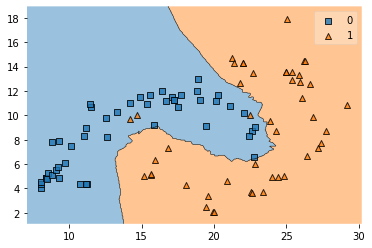

In [62]:
plot_decision_regions(X=X, y=y, clf=bagging)

# Stacking

In [10]:
estimators = [(f'nn {i}', KNeighborsClassifier(n_neighbors=i)) for i in range(1, 10)]
stack_cl = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), passthrough=False)

In [11]:
stack_cl.fit(X, y)

StackingClassifier(estimators=[('nn 1', KNeighborsClassifier(n_neighbors=1)),
                               ('nn 2', KNeighborsClassifier(n_neighbors=2)),
                               ('nn 3', KNeighborsClassifier(n_neighbors=3)),
                               ('nn 4', KNeighborsClassifier(n_neighbors=4)),
                               ('nn 5', KNeighborsClassifier()),
                               ('nn 6', KNeighborsClassifier(n_neighbors=6)),
                               ('nn 7', KNeighborsClassifier(n_neighbors=7)),
                               ('nn 8', KNeighborsClassifier(n_neighbors=8)),
                               ('nn 9', KNeighborsClassifier(n_neighbors=9))],
                   final_estimator=LogisticRegression())

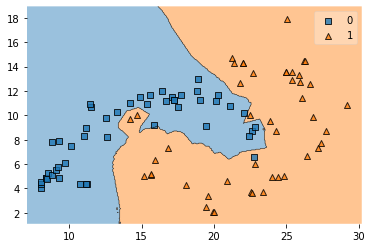

In [12]:
plot_decision_regions(X=X, y=y, clf=stack_cl)

# Gradient boosting

In [61]:
X, y = sklearn.datasets.make_hastie_10_2(n_samples=12000, random_state=1)
X = X.astype(np.float32)


X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

In [82]:
gb = GradientBoostingClassifier(warm_start=True, n_iter_no_change=10)

In [83]:
# def monitor_func(i, estimator, params):

#     print(params.keys())

In [84]:
gb.fit(X_train, y_train, monitor=None)

GradientBoostingClassifier(n_iter_no_change=10, warm_start=True)

In [85]:
for i, y_pred in enumerate(gb.staged_predict(X_test)):
    print(accuracy_score(y_pred, y_test))

0.6156
0.6529
0.6816
0.7129
0.7024
0.7138
0.7413
0.745
0.7534
0.762
0.7729
0.77
0.7683
0.7745
0.7784
0.7796
0.7869
0.7925
0.7965
0.7974
0.8
0.8053
0.8081
0.8098
0.8129
0.8152
0.8207
0.8207
0.8175
0.822
0.8222
0.8247
0.8244
0.8269
0.8277
0.8294
0.8324
0.833
0.8334
0.8348
0.8372
0.8397
0.8412
0.841
0.8428
0.8441
0.8446
0.844
0.8451
0.8452
0.8447
0.8481
0.8489
0.8481
0.8507
0.8481
0.8486
0.8495
0.8523
0.854
0.856
0.8545
0.8558
0.8567
0.8553
0.856
0.8553
0.8565
0.856
0.8561
0.8593
0.8611
0.8612
0.8623
0.862
0.8626
0.8631
0.8642
0.8639
0.8646
0.8639
0.8656
0.8647
0.8653
0.8654
0.866
0.8661
0.8673
0.869
0.867
0.8691
0.8684
0.8685
0.8694
0.8684
0.8694
0.8684
0.8698
0.8703
0.8703


In [92]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = SVC(probability=True)
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)],
    voting='soft')
params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X, y)

AttributeError: predict_proba is not available when  probability=False